In [53]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [54]:
#create variable for data file
clean_data = "Clean_Resources/Master_NC_Dataframe_2020.csv"

#read in data file
clean_data= pd.read_csv(clean_data)

#display data
clean_data.head()

,County,year,Active Dentists,Active Primary Care Physicians,Beds in General Hospitals,Deaths by Injury or Violence,Divorces,General Hospital Discharges,Infant Deaths,Low-Weight Births Under 2500 Grams,Marriages,Midlevel Practitioners,Nongeriatric Deaths,Nursing Facility Beds,Persons Served in Area Mental Health Programs,Pregnancies for Females 15-19,Pregnancies for Females of All Ages,Registered Nurses,Reported Abortions,Resident Deaths,Resident Live Births,"Total Active Physicians, Nonfederal, Non-resident-in-tr",Am. Indian Alaska Native Median Household Income,Am. Indian Alaska Native Per Capita Money Income (Census),Am. Indian Alaska Native Persons in Poverty,Am. Indian Alaska Native Population for Whom Poverty Is Determined,Annual Wages by Place of Work,Average Annual Employment by Place of Work,Average Annual Wage per Worker,Black Median Household Income,Black Persons for Whom Poverty Status Is Determined,Black Persons in Poverty,Black Unemployment Rate (ACS),Employed Females Age 16 Up,Employed Males Age 16 Up,Employment by Place of Residence,Estimated Median Family Income(HUD),Families in Poverty,Families in Poverty with Female Householder,Families in Poverty with Related Children,Families in Poverty/Female Householder & Children,"Families with Income $10,000-14,999","Families with Income $15,000-24,999","Families with Income $25,000-49,999","Families with Income $50,000 or More",Female Unemployment Rate (ACS),Females Age 16 Up in Labor Force,First Quarter Payroll by Place of Work,Hispanic Median Household Income,Hispanic Persons in Poverty,Hispanic Population for Whom Poverty is Determined,Labor Force by Place of Residence,Male Unemployment Rate (ACS),Males Age 16 Up in Labor Force,Manufacturing Employment by Place of Work,Manufacturing Employment for Residents Age 16 Up,Mean Family Income,Median Family Income,Median Female Income,Median Household Income_x,Median Income,Median Male Income,Nonagric. Wage & Salary Employment by Place of Work,Nonmanuf. Employment for Residents Age 16 Up,Nonmanufacturing Employment by Place of Work,Per Capita Money Income (Census),Percent of White Persons in Poverty,Percent of Am. Indian Alaska Native Persons in Poverty,Percent of Black Persons in Poverty,Percent of Hispanic Persons in Poverty,Percent of Persons 65 Up in Poverty,Percent of Persons in Poverty,Percent of Related Children under 18 in Poverty,Percent of Related Children under 6 in Poverty,Persons 65 Up for Whom Poverty Status Is Determined,Persons 65 Up in Poverty,Persons for Whom Poverty Status Is Determined,Persons in Poverty,Related Children under 18 in Poverty,Related Children under 18-Poverty Status Determined,Related Children under 6 in Poverty,Related Children under 6-Poverty Status Determined,Unemployed Females Age 16 Up,Unemployed Males Age 16 Up,Unemployment Rate (ACS),Unemployment Rate by Place of Residence (Percent),Unemployment by Place of Residence,White Persons for Whom Poverty Status Is Determined,White Persons in Poverty,Female-Other-Population Age 0-4,Female-Other-Population Age 5,Female-Other-Population Age 6-9,Female-Other-Population Age 10-12,Female-Other-Population Age 13,Female-Other-Population Age 14,Female-Other-Population Age 15,Female-Other-Population Age 16-17,Female-Other-Population Age 18,Female-Other-Population Age 19,Female-Other-Population Age 20-24,Female-Other-Population Age 25-29,Female-Other-Population Age 30-34,Female-Other-Population Age 35-39,Female-Other-Population Age 40-44,Female-Other-Population Age 45-49,Female-Other-Population Age 50-54,Female-Other-Population Age 55-59,Female-Other-Population Age 60-64,Female-Other-Population Age 65-69,Female-Other-Population Age 70-74,Female-Other-Population Age 75-79,Female-Other-Population Age 80-84,Female-Other-Population Age 85 and Over,Female-White-Population Age 0-4,Female-White-Population Age 5,Female-White-Population Age 6-9,Female-White-Population Age 10-12,Female-White-Population Age 13,Female-White-Population Age 14,Female-White-Populat

In [55]:
# create dataframe with interested initial data 
small_data= pd.DataFrame({
    'County': clean_data['County'],
    'Percent of Persons in Poverty': clean_data['Percent of Persons in Poverty'],
    'Population Density (Persons per Square Mile)': clean_data['Population Density (Persons per Square Mile)'],
    'Resident Live Births': clean_data['Resident Live Births'],
    'Mean Family Income': clean_data['Mean Family Income'],
    'death_per_1000_infant_death': clean_data['death_per_1000_infant_death'],
    'Infant Deaths': clean_data['Infant Deaths'],
    'Pregnancies for Females of All Ages': clean_data['Pregnancies for Females of All Ages'],
    'Pregnancies for Females 15-19': clean_data['Pregnancies for Females 15-19'],
    'Population (Census/Estimate/Projection)': clean_data['Population (Census/Estimate/Projection)'], 
    'Population Density (Persons per Square Mile)': clean_data['Population Density (Persons per Square Mile)'],
    'Midlevel Practitioners': clean_data['Midlevel Practitioners'],
    'Public School Expenditures (000s)': clean_data['Public School Expenditures (000s)'],
    'Black Population': clean_data['Black Population'],
    'Persons in Poverty': clean_data['Persons in Poverty'],
    'Families in Poverty with Female Householder': clean_data['Families in Poverty with Female Householder'],
    'Public School Instructional Personnel': clean_data['Public School Instructional Personnel'],
})

small_data.head()

,County,Percent of Persons in Poverty,Population Density (Persons per Square Mile),Resident Live Births,Mean Family Income,death_per_1000_infant_death,Infant Deaths,Pregnancies for Females of All Ages,Pregnancies for Females 15-19,Population (Census/Estimate/Projection),Midlevel Practitioners,Public School Expenditures (000s),Black Population,Persons in Poverty,Families in Poverty with Female Householder,Public School Instructional Personnel
0,Alamance County,15.42,394.75,1831.0,83335.0,0.064172,11.0,2270.0,133.0,171415.0,134.0,216506.0,34014.0,24893.0,3277.0,1643.0
1,Alexander County,12.30,138.24,346.0,81515.0,0.027439,1.0,377.0,23.0,36444.0,25.0,46639.0,1932.0,4403.0,375.0,322.0
2,Alleghany County,22.61,46.08,96.0,69940.0,0.000000,0.0,106.0,7.0,10888.0,9.0,16744.0,104.0,2482.0,256.0,114.0
3,Anson County,18.77,41.06,278.0,64011.0,0.226706,5.0,348.0,33.0,22055.0,11.0,35207.0,9871.0,4264.0,730.0,207.0
4,Ashe County,14.83,61.90,233.0,64186.0,0.075253,2.0,242.0,29.0,26577.0,28.0,33133.0,127.0,3959.0,407.0,216.0


In [56]:
#Sorting the data by infant death per 1000
infant_death_per_1000 = pd.DataFrame(clean_data, columns=['County', 'death_per_1000_infant_death'])
infant_death_per_1000 = infant_death_per_1000.sort_values(by=['death_per_1000_infant_death'], ascending=False)
#print(infant_death_per_1000.head(150))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#print(infant_death_per_1000)
infant_death_per_1000.head()

,County,death_per_1000_infant_death
3,Anson County,0.226706
92,Warren County,0.214569
76,Richmond County,0.209566
45,Hertford County,0.185598
30,Duplin County,0.184748


In [57]:
#Sorting the data by infant death per 1000
infant_death_per_1000 = pd.DataFrame(clean_data, columns=['County', 'death_per_1000_infant_death', 'Population (Census/Estimate/Projection)', 'Population Density (Persons per Square Mile)'])
infant_death_per_1000 = infant_death_per_1000.sort_values(by=['death_per_1000_infant_death'], ascending=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#print(infant_death_per_1000)
infant_death_per_1000.head(-1)

,County,death_per_1000_infant_death,Population (Census/Estimate/Projection),Population Density (Persons per Square Mile)
37,Graham County,0.000000,8030.0,26.62
74,Polk County,0.000000,19328.0,81.06
14,Camden County,0.000000,10355.0,33.38
20,Chowan County,0.000000,13708.0,58.67
21,Clay County,0.000000,11089.0,50.23
58,McDowell County,0.000000,44578.0,100.10
26,Currituck County,0.000000,28100.0,53.38
16,Caswell County,0.000000,22736.0,53.03
27,Dare County,0.000000,36915.0,23.94
88,Tyrrell County,0.000000,3245.0,5.43


In [58]:
#mean, median, mode of population
mean_population = np.mean(infant_death_per_1000['Population (Census/Estimate/Projection)'])
print(f"The mean county population in NC is {mean_population}")

median_population = np.median(infant_death_per_1000['Population (Census/Estimate/Projection)'])
print(f"The median county population in NC is {median_population}")

The mean county population in NC is 104393.88
The median county population in NC is 51352.5


In [59]:
#mean, median, mode of population density
mean_population = np.mean(infant_death_per_1000['Population Density (Persons per Square Mile)'])
print(f"The mean county population per square mile in NC is {mean_population}")

median_population = np.median(infant_death_per_1000['Population Density (Persons per Square Mile)'])
print(f"The median county population per square mile in NC is {median_population}")

The mean county population per square mile in NC is 200.20620000000002
The median county population per square mile in NC is 108.905


In [60]:
#Bin infant_deaths_per_1000
#Define bin labels
bin_df = infant_death_per_1000[['County', 'death_per_1000_infant_death']]
bin_labels = ['0', '.02', '.04', '.06', '.08', '.10', '.12', '.14', '.16', '.18', '.20', '.22']
#Create bins
bins= [-1, .02, .04, .06, .08, .10, .12, .14, .16, .18, .20, .22, .24]
#Create new column infant_deaths_per_1000_bin
bin_df['death_per_1000_infant_death'] = pd.cut(bin_df['death_per_1000_infant_death'], bins=bins, labels=bin_labels)
#Check new column
#bin_df.head()
bin_df.groupby('death_per_1000_infant_death').count()

C:\Users\lorig\AppData\Local\Temp\ipykernel_11712\1231407308.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_df['death_per_1000_infant_death'] = pd.cut(bin_df['death_per_1000_infant_death'], bins=bins, labels=bin_labels)


,County
death_per_1000_infant_death,
0,17
.02,6
.04,21
.06,16
.08,9
.10,8
.12,9
.14,4
.16,3


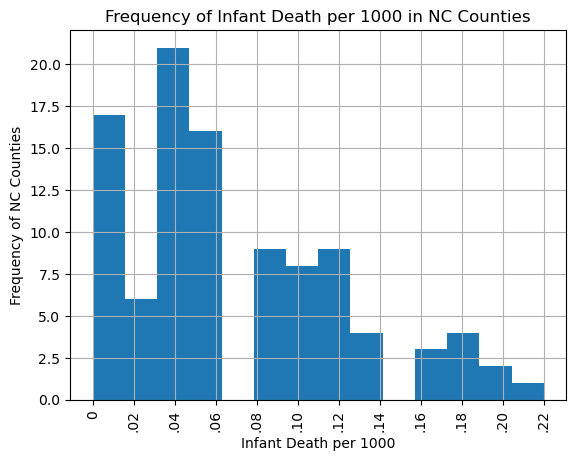

In [61]:
#infant_death_per_1000 histogram with 13 bins
bin_df["death_per_1000_infant_death"].hist(bins=14)
plt.xticks(rotation=90)
plt.xlabel("Infant Death per 1000")
plt.ylabel("Frequency of NC Counties")
plt.title("Frequency of Infant Death per 1000 in NC Counties")
plt.show()

In [62]:
# find percent of infant deaths in each NC county (infant deaths/ live births)) 
pct_infant_deaths = pd.DataFrame(small_data)
pct_infant_deaths= pct_infant_deaths["Infant Deaths"]/ pct_infant_deaths["Resident Live Births"]
pct_infant_deaths = pd.DataFrame({'County': small_data['County'], '% Infant Deaths': pct_infant_deaths})
pct_infant_deaths['% Infant Deaths'] = pct_infant_deaths['% Infant Deaths'].map(lambda x: x*100)
#Sorting the data by infant death per total of live births and infant deaths
pct_infant_deaths = pct_infant_deaths.sort_values(by=['% Infant Deaths'], ascending=False)


#pct_infant_deaths.head()
print(pct_infant_deaths)

                 County  % Infant Deaths
92        Warren County         2.247191
45      Hertford County         1.923077
3          Anson County         1.798561
57        Martin County         1.746725
65   Northampton County         1.724138
7         Bertie County         1.685393
82      Scotland County         1.643836
73          Pitt County         1.548452
29         Davie County         1.546392
76      Richmond County         1.500000
6       Beaufort County         1.401869
98        Yadkin County         1.381215
84        Stokes County         1.305483
30        Duplin County         1.287554
18       Chatham County         1.240310
32     Edgecombe County         1.180438
8         Bladen County         1.162791
35        Gaston County         1.138594
68       Pamlico County         1.123596
97        Wilson County         1.113586
61    Montgomery County         1.111111
69    Pasquotank County         1.089325
71    Perquimans County         1.086957
63          Nash

In [63]:
# make a new df with info but ignore the zeros
top_bottom_5 = small_data[clean_data['death_per_1000_infant_death'] !=0]
# sort the df by the death_per_1000_infant_death column
top_bottom_5 = top_bottom_5.sort_values(by=['death_per_1000_infant_death'], ascending=False)
#print
print(top_bottom_5)

                 County  Percent of Persons in Poverty  \
3          Anson County                          18.77   
92        Warren County                          20.90   
76      Richmond County                          22.40   
45      Hertford County                          20.47   
30        Duplin County                          18.18   
73          Pitt County                          20.80   
57        Martin County                          20.44   
82      Scotland County                          27.25   
65   Northampton County                          20.09   
7         Bertie County                          24.99   
46          Hoke County                          18.59   
25    Cumberland County                          18.75   
32     Edgecombe County                          22.28   
29         Davie County                          13.72   
8         Bladen County                          24.34   
6       Beaufort County                          17.79   
98        Yadk

In [64]:
# create top 5 df (.head(5) to the end of the sorted df)
top_5 = top_bottom_5.head(5)
print(top_5)


             County  Percent of Persons in Poverty  \
3      Anson County                          18.77   
92    Warren County                          20.90   
76  Richmond County                          22.40   
45  Hertford County                          20.47   
30    Duplin County                          18.18   

    Population Density (Persons per Square Mile)  Resident Live Births  \
3                                          41.06                 278.0   
92                                         41.96                 178.0   
76                                         89.53                 600.0   
45                                         59.80                 208.0   
30                                         59.39                 699.0   

    Mean Family Income  death_per_1000_infant_death  Infant Deaths  \
3              64011.0                     0.226706            5.0   
92             68638.0                     0.214569            4.0   
76             62812

In [65]:
# create bottom 5 df (.tail(5) to the end of the sorted df)
bottom_5 = top_bottom_5.tail(5)
print(bottom_5)

              County  Percent of Persons in Poverty  \
96     Wilkes County                          16.42   
85      Surry County                          16.43   
1   Alexander County                          12.30   
72     Person County                          16.26   
9   Brunswick County                          11.10   

    Population Density (Persons per Square Mile)  Resident Live Births  \
96                                         87.22                 682.0   
85                                        132.97                 756.0   
1                                         138.24                 346.0   
72                                         96.68                 426.0   
9                                         130.24                1000.0   

    Mean Family Income  death_per_1000_infant_death  Infant Deaths  \
96             70035.0                     0.030317            2.0   
85             76731.0                     0.028027            2.0   
1             

In [66]:
bottom_5_index=bottom_5.index
top_5_index=top_5.index

print(bottom_5_index)
print(top_5_index)

Int64Index([96, 85, 1, 72, 9], dtype='int64')
Int64Index([3, 92, 76, 45, 30], dtype='int64')


In [67]:
#Create a bar graph for every column in small data frame that is in top_5 or bottom_5
top_bottom_df = small_data.loc[top_5_index].append(small_data.loc[bottom_5_index])
#ignore zeros in death_per_1000_infant_death
top_bottom_df = top_bottom_df[top_bottom_df['death_per_1000_infant_death'] != 0]
top_bottom_df

C:\Users\lorig\AppData\Local\Temp\ipykernel_11712\409902632.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_bottom_df = small_data.loc[top_5_index].append(small_data.loc[bottom_5_index])


,County,Percent of Persons in Poverty,Population Density (Persons per Square Mile),Resident Live Births,Mean Family Income,death_per_1000_infant_death,Infant Deaths,Pregnancies for Females of All Ages,Pregnancies for Females 15-19,Population (Census/Estimate/Projection),Midlevel Practitioners,Public School Expenditures (000s),Black Population,Persons in Poverty,Families in Poverty with Female Householder,Public School Instructional Personnel
3,Anson County,18.77,41.06,278.0,64011.0,0.226706,5.0,348.0,33.0,22055.0,11.0,35207.0,9871.0,4264.0,730.0,207.0
92,Warren County,20.90,41.96,178.0,68638.0,0.214569,4.0,220.0,12.0,18642.0,5.0,23740.0,9114.0,3943.0,625.0,288.0
76,Richmond County,22.40,89.53,600.0,62812.0,0.209566,9.0,700.0,74.0,42946.0,35.0,70846.0,12881.0,9702.0,1498.0,465.0
45,Hertford County,20.47,59.80,208.0,65058.0,0.185598,4.0,242.0,20.0,21552.0,30.0,31384.0,12393.0,4406.0,460.0,190.0
30,Duplin County,18.18,59.39,699.0,63663.0,0.184748,9.0,801.0,84.0,48715.0,31.0,87085.0,11604.0,10613.0,1121.0,597.0
96,Wilkes County,16.42,87.22,682.0,70035.0,0.030317,2.0,746.0,71.0,65969.0,40.0,87805.0,2634.0,11033.0,1003.0,610.0
85,Surry County,16.43,132.97,756.0,76731.0,0.028027,2.0,830.0,60.0,71359.0,106.0,105623.0,2486.0,11653.0,1047.0,754.0
1,Alexander County,12.30,138.24,346.0,81515.0,0.027439,1.0,377.0,23.0,36444.0,25.0,46639.0,1932.0,4403.0,375.0,322.0
72,Person County,16.26,96.68,426.0,83489.0,0.025577,1.0,519.0,27.0,39097.0,31.0,43869.0,9937.0,6353.0,844.0,356.0
9,Brunswick County,11.10,130.24,1000.0,88026.0,0.021947,3.0,1140.0,76.0,136693.0,128.0,129368.0,11546.0,15137.0,812.0,884.0


In [68]:
#Add a column with the results of a midlevel practitioners divided by the population x 1000 named "midlevel_practitioners_per_1000"
top_bottom_df['Midlevel Practitioners/1000']= top_bottom_df.apply(lambda row: row['Midlevel Practitioners']/row['Population (Census/Estimate/Projection)']*1000, axis=1)

In [69]:
#Add a column with the results of a resident live births divided by the population x 1000
top_bottom_df['Resident Live Births/1000']= top_bottom_df.apply(lambda row: row['Resident Live Births']/row['Population (Census/Estimate/Projection)']*1000, axis=1)

In [70]:
#Add a column with the results of a infant deaths divided by the population x 1000
top_bottom_df['Infant Deaths/1000']= top_bottom_df.apply(lambda row: row['Infant Deaths']/row['Population (Census/Estimate/Projection)']*1000, axis=1)

In [71]:
#Add a column with infant deaths per 1000 divided by the resident live births per 1000
top_bottom_df['Death/Birth per thousand']= top_bottom_df['Infant Deaths/1000']/top_bottom_df['Resident Live Births/1000']

In [72]:
#Add a column with the results of a pregnancy for females divided by the population x 1000
top_bottom_df['Pregnancy for Females/1000']= top_bottom_df.apply(lambda row: row['Pregnancies for Females of All Ages']/row['Population (Census/Estimate/Projection)']*1000, axis=1)

In [73]:
#Add a column with the results of a pregnancy for females ages 15-19 divided by the population x 1000
top_bottom_df['Pregnancy for Females Ages 15-19/1000']= top_bottom_df.apply(lambda row: row['Pregnancies for Females 15-19']/row['Population (Census/Estimate/Projection)']*1000, axis=1)

In [74]:
#Add a column with the results public school expenditures divided by the population x 1000
top_bottom_df['Public School Expenditures/1000']= top_bottom_df.apply(lambda row: row['Public School Expenditures (000s)']/row['Population (Census/Estimate/Projection)']*1000, axis=1)

In [75]:
#Add a column with the results of black population divided by the population x 1000
top_bottom_df['Black Population/1000']= top_bottom_df.apply(lambda row: row['Black Population']/row['Population (Census/Estimate/Projection)']*1000, axis=1)

In [76]:
#Add a column with the results of Persons in Poverty divided by the population x 1000
top_bottom_df['Persons in Poverty/1000']= top_bottom_df.apply(lambda row: row['Persons in Poverty']/row['Population (Census/Estimate/Projection)']*1000, axis=1)

In [77]:
#Add a column with the results of Families in Poverty with Female Householder divided by the population x 1000
top_bottom_df['Families in Poverty with Female Householder/1000']= top_bottom_df.apply(lambda row: row['Families in Poverty with Female Householder']/row['Population (Census/Estimate/Projection)']*1000, axis=1)

In [78]:
#Add a column with the results of Public school instructional personnel divided by the population x 1000
top_bottom_df['Public School Personnel/1000']= top_bottom_df.apply(lambda row: row['Public School Instructional Personnel']/row['Population (Census/Estimate/Projection)']*1000, axis=1)

In [79]:
#Sort data by death_per_1000_infant_death
top_bottom_df.sort_values(by=['death_per_1000_infant_death'], inplace=True, ascending=False)
#create new df for top 5
top_df=top_bottom_df.head()
print(top_df)

             County  Percent of Persons in Poverty  \
3      Anson County                          18.77   
92    Warren County                          20.90   
76  Richmond County                          22.40   
45  Hertford County                          20.47   
30    Duplin County                          18.18   

    Population Density (Persons per Square Mile)  Resident Live Births  \
3                                          41.06                 278.0   
92                                         41.96                 178.0   
76                                         89.53                 600.0   
45                                         59.80                 208.0   
30                                         59.39                 699.0   

    Mean Family Income  death_per_1000_infant_death  Infant Deaths  \
3              64011.0                     0.226706            5.0   
92             68638.0                     0.214569            4.0   
76             62812

In [80]:
#create new df for bottom 5
bottom_df=top_bottom_df.tail()
print(bottom_df)

              County  Percent of Persons in Poverty  \
96     Wilkes County                          16.42   
85      Surry County                          16.43   
1   Alexander County                          12.30   
72     Person County                          16.26   
9   Brunswick County                          11.10   

    Population Density (Persons per Square Mile)  Resident Live Births  \
96                                         87.22                 682.0   
85                                        132.97                 756.0   
1                                         138.24                 346.0   
72                                         96.68                 426.0   
9                                         130.24                1000.0   

    Mean Family Income  death_per_1000_infant_death  Infant Deaths  \
96             70035.0                     0.030317            2.0   
85             76731.0                     0.028027            2.0   
1             

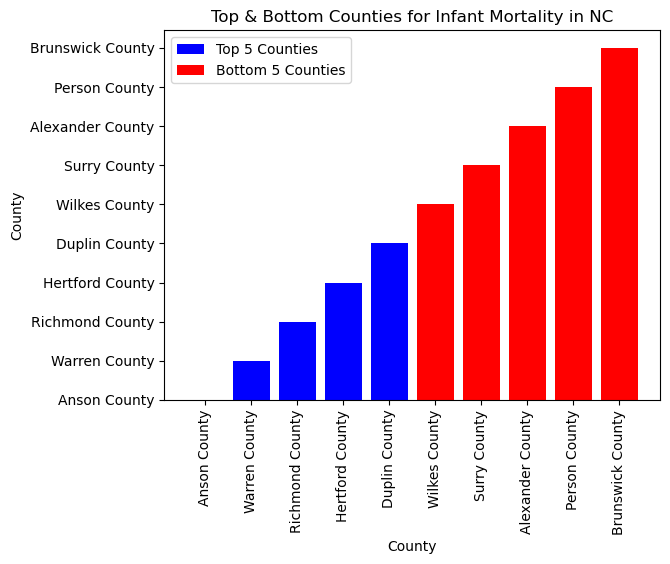

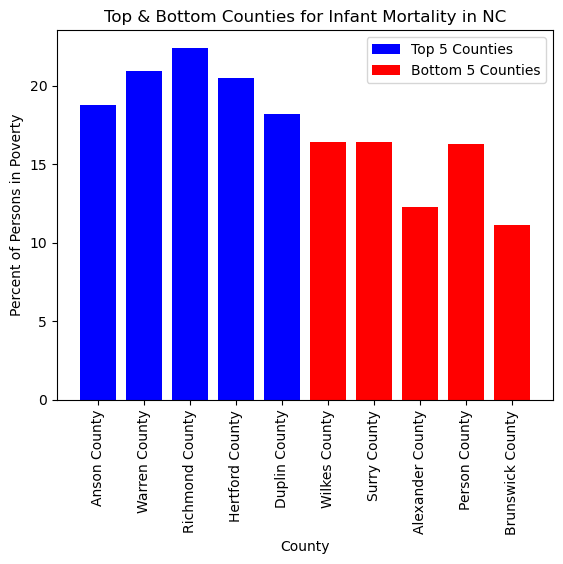

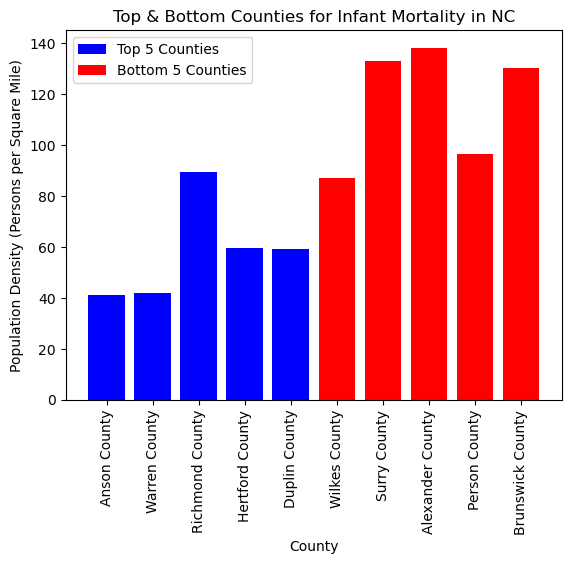

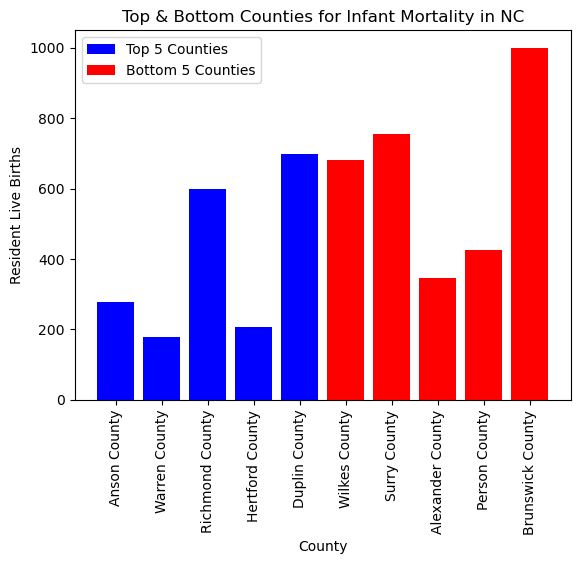

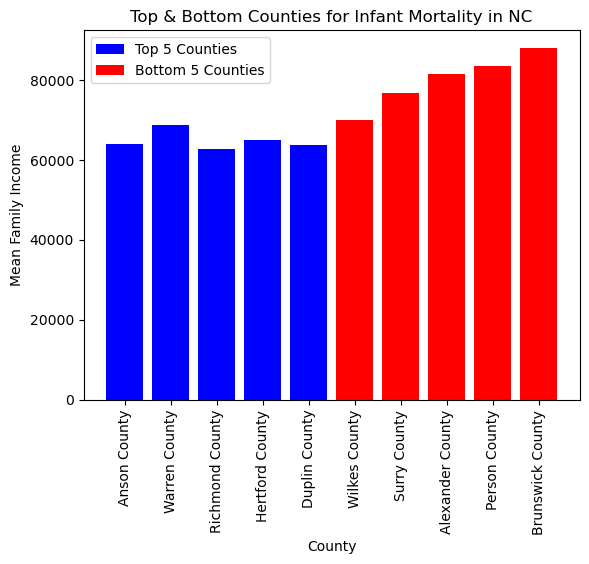

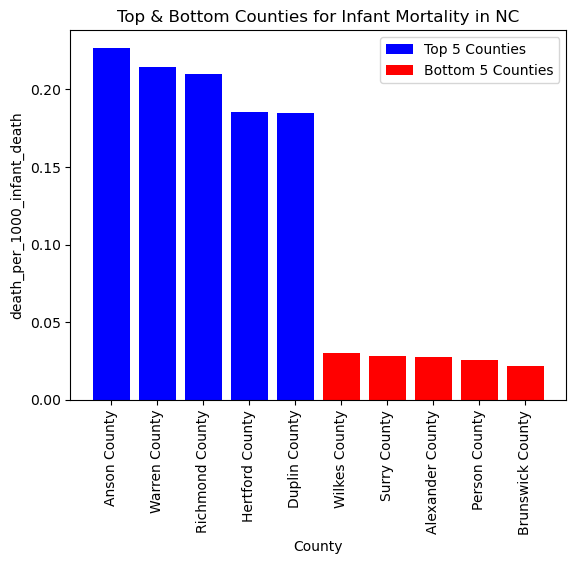

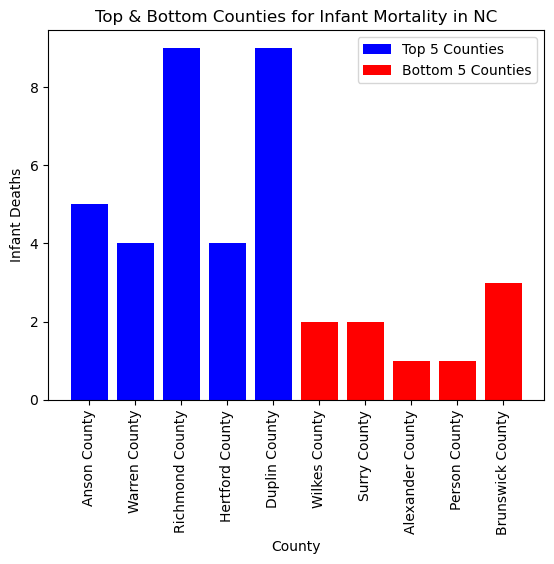

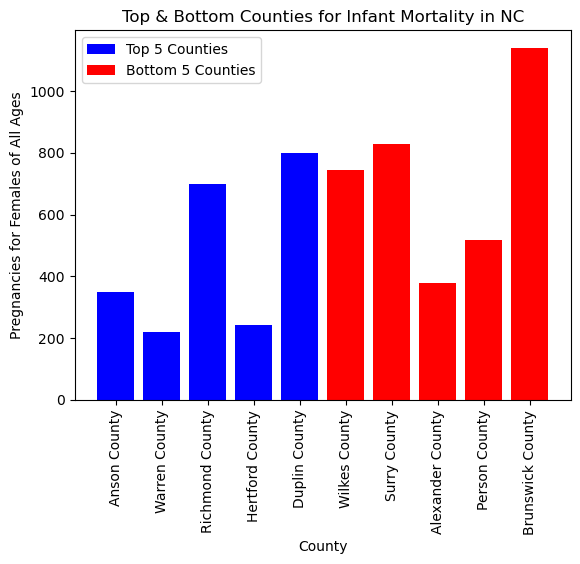

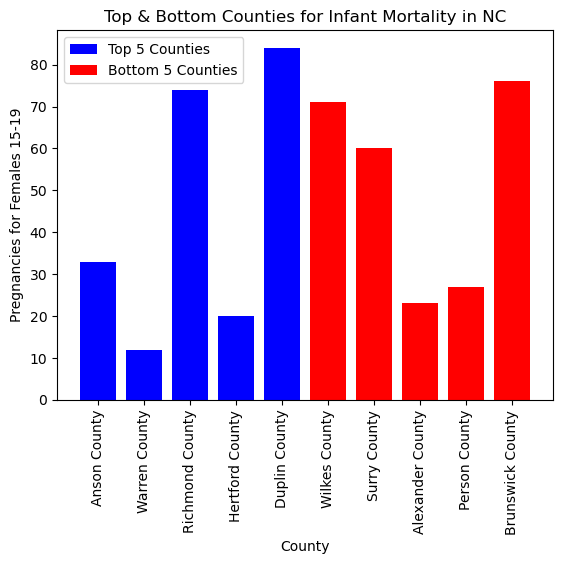

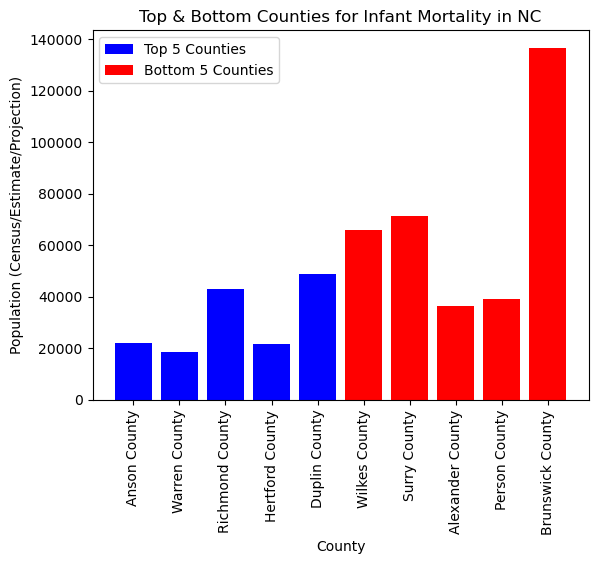

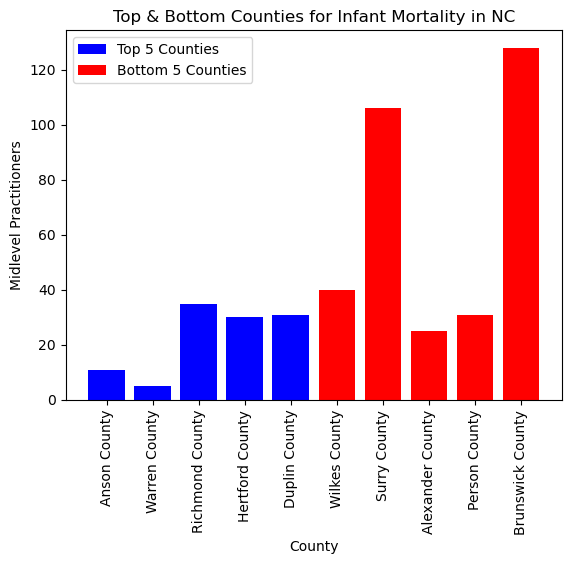

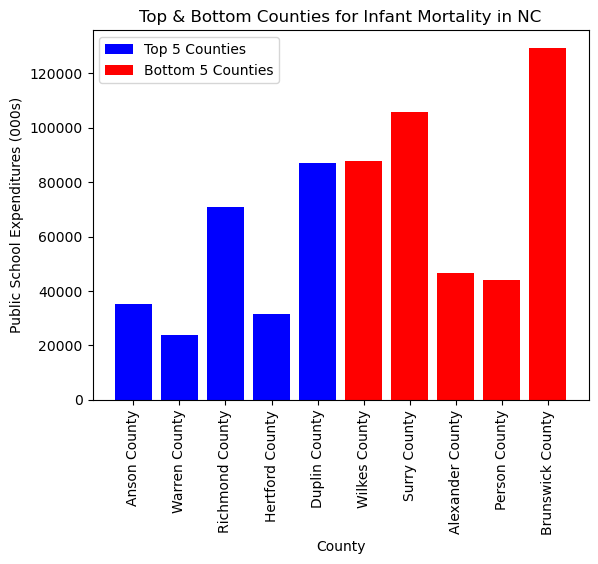

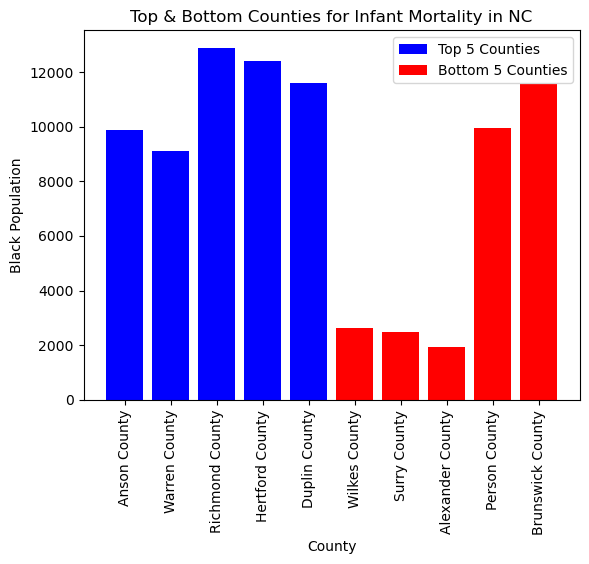

In [ ]:
#Loop through each column in the dataframe and create a bar chart for each column
for column in top_bottom_df.columns:
    if column != 'County' + column != 'death_per_1000_infant_death':
        top_bottom_df[column] = top_bottom_df[column]
        plt.bar(top_df['County'], top_df[column], color='blue')
        plt.bar(bottom_df['County'], bottom_df[column], color= 'red')
        plt.xticks(rotation=90)
        plt.xlabel('County')
        plt.ylabel(column)
        plt.title('Top & Bottom Counties for Infant Mortality in NC')
        plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
        plt.show()

In [ ]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for population
plt.bar(top_5['County'], top_5['Population (Census/Estimate/Projection)'], color='red')
plt.bar(bottom_5['County'], bottom_5['Population (Census/Estimate/Projection)'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Population')
plt.title('Population of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

In [ ]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for population density
plt.bar(top_5['County'], top_5['Population Density (Persons per Square Mile)'], color='red')
plt.bar(bottom_5['County'], bottom_5['Population Density (Persons per Square Mile)'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Population Density (Persons per Square Mile)')
plt.title('Population Density of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

In [ ]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for Percent of Persons in Poverty
plt.bar(top_5['County'], top_5['Percent of Persons in Poverty'], color='red')
plt.bar(bottom_5['County'], bottom_5['Percent of Persons in Poverty'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Poverty Percentage')
plt.title('Poverty Percent of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

In [ ]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for mean family income
plt.bar(top_5['County'], top_5['Mean Family Income'], color='red')
plt.bar(bottom_5['County'], bottom_5['Mean Family Income'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Mean Family Income')
plt.title('Mean Family Income of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

In [ ]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for pregnancies for females of all ages
plt.bar(top_5['County'], top_5['Pregnancies for Females of All Ages'], color='red')
plt.bar(bottom_5['County'], bottom_5['Pregnancies for Females of All Ages'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Total Number of Pregnancies (All Ages)')
plt.title('Total # of Pregnancies of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

In [ ]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for pregnancies for females 15-19 years old
plt.bar(top_5['County'], top_5['Pregnancies for Females 15-19'], color='red')
plt.bar(bottom_5['County'], bottom_5['Pregnancies for Females 15-19'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Pregancies for Females Age 15-19')
plt.title('Age 15-19 Pregnancies of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

In [ ]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for midlevel practitioners
plt.bar(top_5['County'], top_5['Midlevel Practitioners'], color='red')
plt.bar(bottom_5['County'], bottom_5['Midlevel Practitioners'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Midlevel Practitioners')
plt.title('Number of Midlevel Practioners of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

In [ ]:
#Add a column with the results of a midlevel practitioners divided by the population x 1000 named "midlevel_practitioners_per_1000"
top_bottom_df['midlevel_practitioners_per_1000']= top_bottom_df.apply(lambda row: row['Midlevel Practitioners']/row['Population(Census/Estimate/Projection)']*1000, axis=1)

In [ ]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for midlevel practitioners per 1000 people
plt.bar(top_5['County'], top_5['Midlevel Practitioners']/top_5['Population (Census/Estimate/Projection)'].map(lambda x: x*1000), color='red')
plt.bar(bottom_5['County'], bottom_5['Midlevel Practitioners']/bottom_5['Population (Census/Estimate/Projection)'].map(lambda x: x*1000), color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Midlevel Practitioners')
plt.title('Number of Midlevel Practioners of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()